In [1]:
using Statistics
using FFTW
using MAT
using DelimitedFiles
using Plots
using Measures
include("FluidNetworkTools.jl")

dat2csv (generic function with 2 methods)

# Read in Data
---

In [2]:
case = "./q_files/Re100_kb_0.625_Q_mg_3.mat";


# Read in data
# --------------------------------------

fileIn = matopen(case)

xb = read(fileIn, "x_body")
yb = read(fileIn, "y_body")
ẋb_full  = read(fileIn, "vxb") 
ẏb_full  = read(fileIn, "vyb") 

close(fileIn)


ẏb = ẏb_full[:,1:end-1];
ẋb = ẋb_full[:,1:end-1];

# Calculate POD Modes
---

In [3]:
X = vcat(ẋb, ẏb)
res, singularvals = FluidNetworkTools.PODsvd(X);

In [4]:
sum(singularvals[1:3].^2 ./2)/sum(singularvals.^2 ./2)

0.9999999303223248

# Plot Data
---

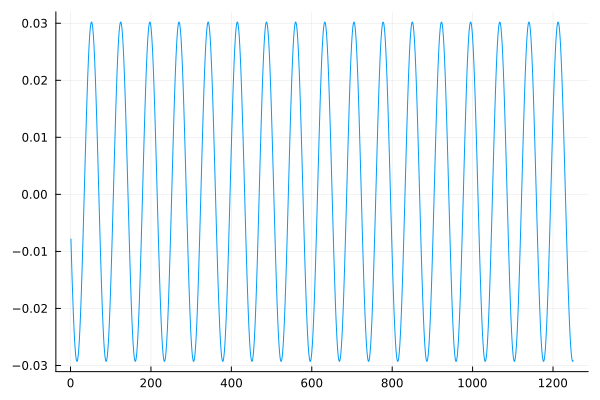

In [5]:
plot(X[end,:], legend = :false)

# Publication Plots
---

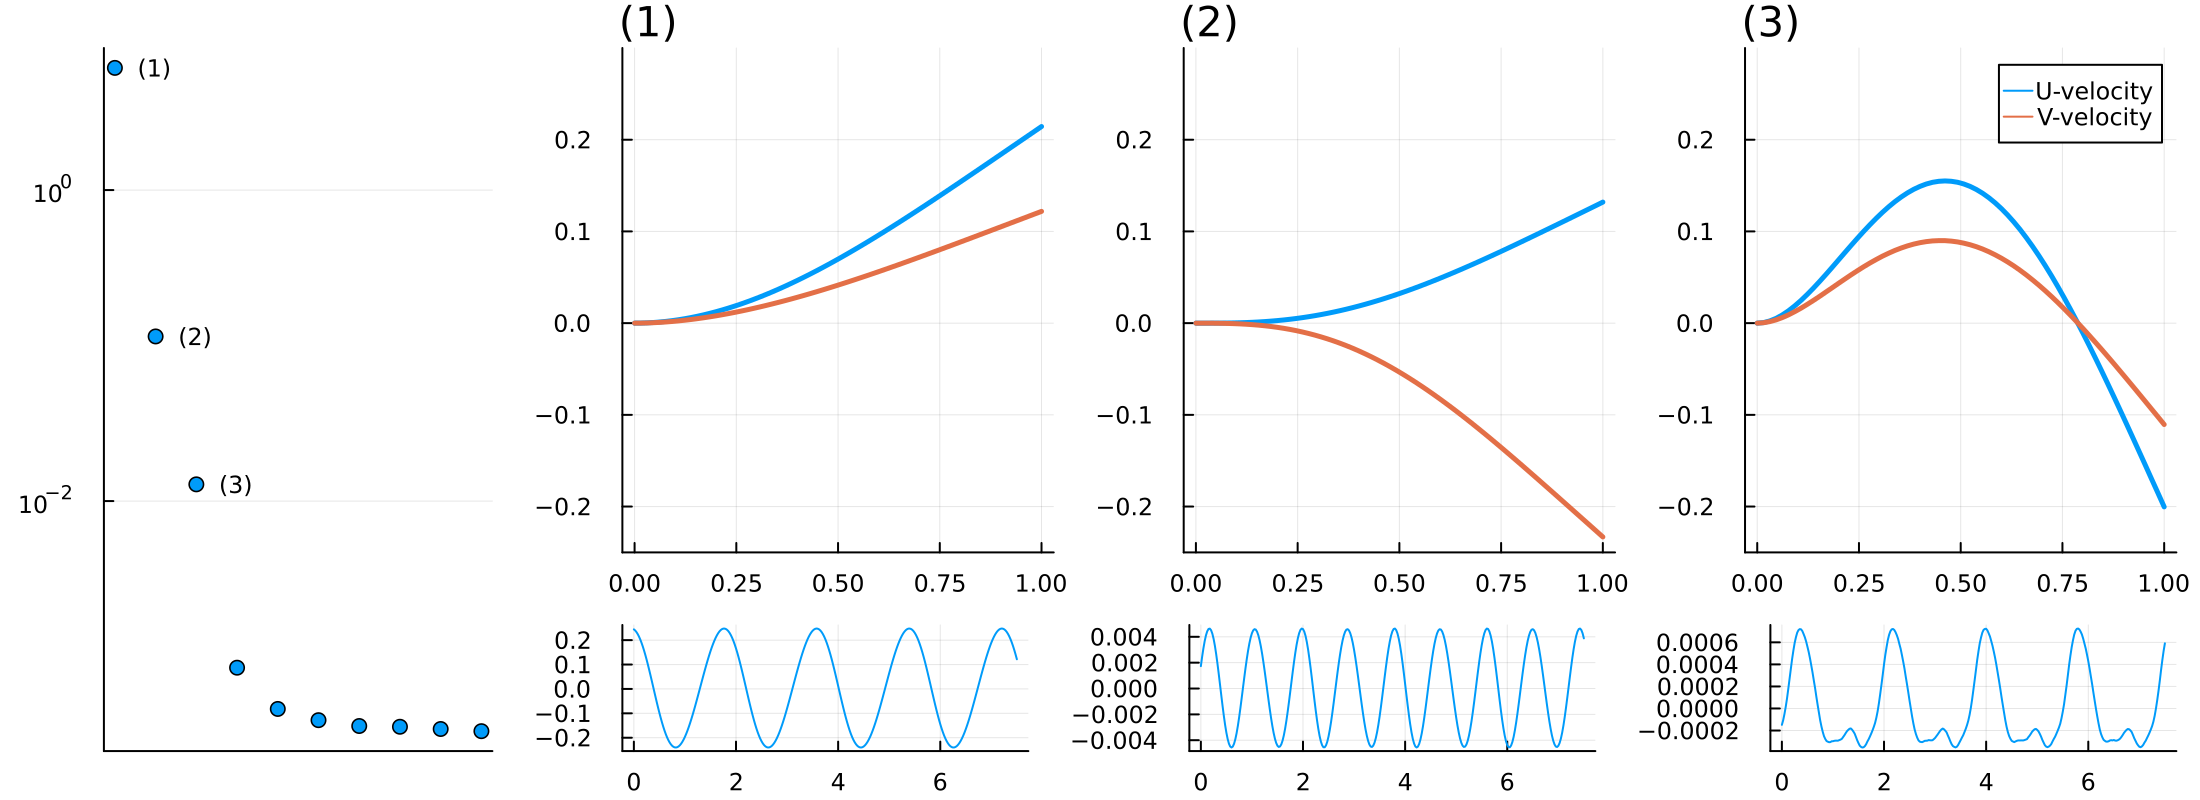

In [6]:
l_span = range(0,1, length = 66)
t_span = 0:0.025:150*0.025*2

# ----------------------------

plot(l_span, res.modes[1:66,1], title = "(1)", titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3])
p1 = plot!(l_span, res.modes[67:end,1], titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3], legend = :false)

plot(l_span, res.modes[1:66,2], title = "(2)", titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3])
p2 = plot!(l_span, res.modes[67:end,2], titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3], legend = :false)

plot(l_span, res.modes[1:66,3], title = "(3)", titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3], label = "U-velocity")
p3 = plot!(l_span, res.modes[67:end,3], titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3], label = "V-velocity")

pp1 = plot(p1, p2, p3, layout = grid(1,3))

p1 = plot(t_span, res.coefficients[1,200:500])#, ylim = [-0.5, 0.5])
p2 = plot(t_span, res.coefficients[2,200:500])#, ylim = [-0.05, 0.05])
p3 = plot(t_span, res.coefficients[3,200:500])#, ylim = [-0.025, 0.025])

pp2 = plot(p1, p2, p3, layout = grid(1,3), legend = :false)

mode_shapes = plot(pp1, pp2, layout = grid(2,1, heights = [0.8, 0.2]))

mode_coeff = scatter(singularvals[1:10], yaxis = :log, xticks = :false, legend = :false, series_annotations = text.(["   (1)"; "   (2)"; "   (3)"; ""; ""; ""; ""; ""; ""; ""], :left, 8), ytickfontsize = 8)

plot(mode_coeff, mode_shapes, layout = grid(1, 2, widths = [0.2, 0.8]), size = [1100, 400], dpi = 200)

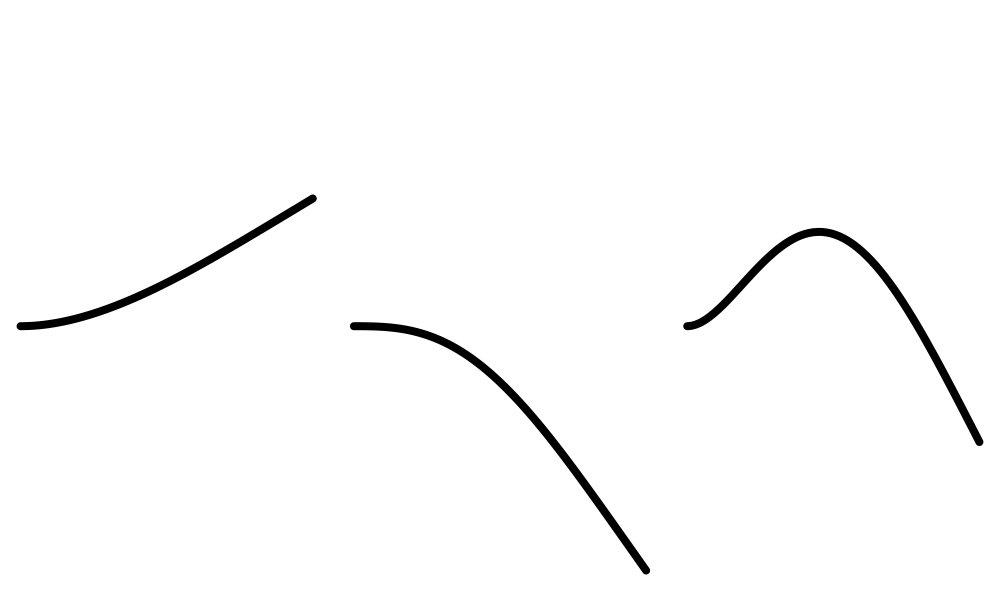

In [7]:
# plot(l_span, res.modes[1:66,1], title = "(1)", titleloc = :left, linewidth = 8, ylim = [-0.25, 0.3])
p1 = plot(l_span, res.modes[67:end,1], titleloc = :left, linewidth = 8, ylim = [-0.25, 0.3], legend = :false, c = :black)

# plot(l_span, res.modes[1:66,2], title = "(2)", titleloc = :left, linewidth = 8, ylim = [-0.25, 0.3])
p2 = plot(l_span, res.modes[67:end,2], titleloc = :left, linewidth = 8, ylim = [-0.25, 0.3], legend = :false, c = :black)

# plot(l_span, res.modes[1:66,3], title = "(3)", titleloc = :left, linewidth = 8, ylim = [-0.25, 0.3], label = "U-velocity")
p3 = plot(l_span, res.modes[67:end,3], titleloc = :left, linewidth = 8, ylim = [-0.25, 0.3], legend = :false, c = :black)

plot(p1, p2, p3, layout = grid(1, 3), axis = :false, ticks = :false, colorbar = :false, size = [1000, 600])

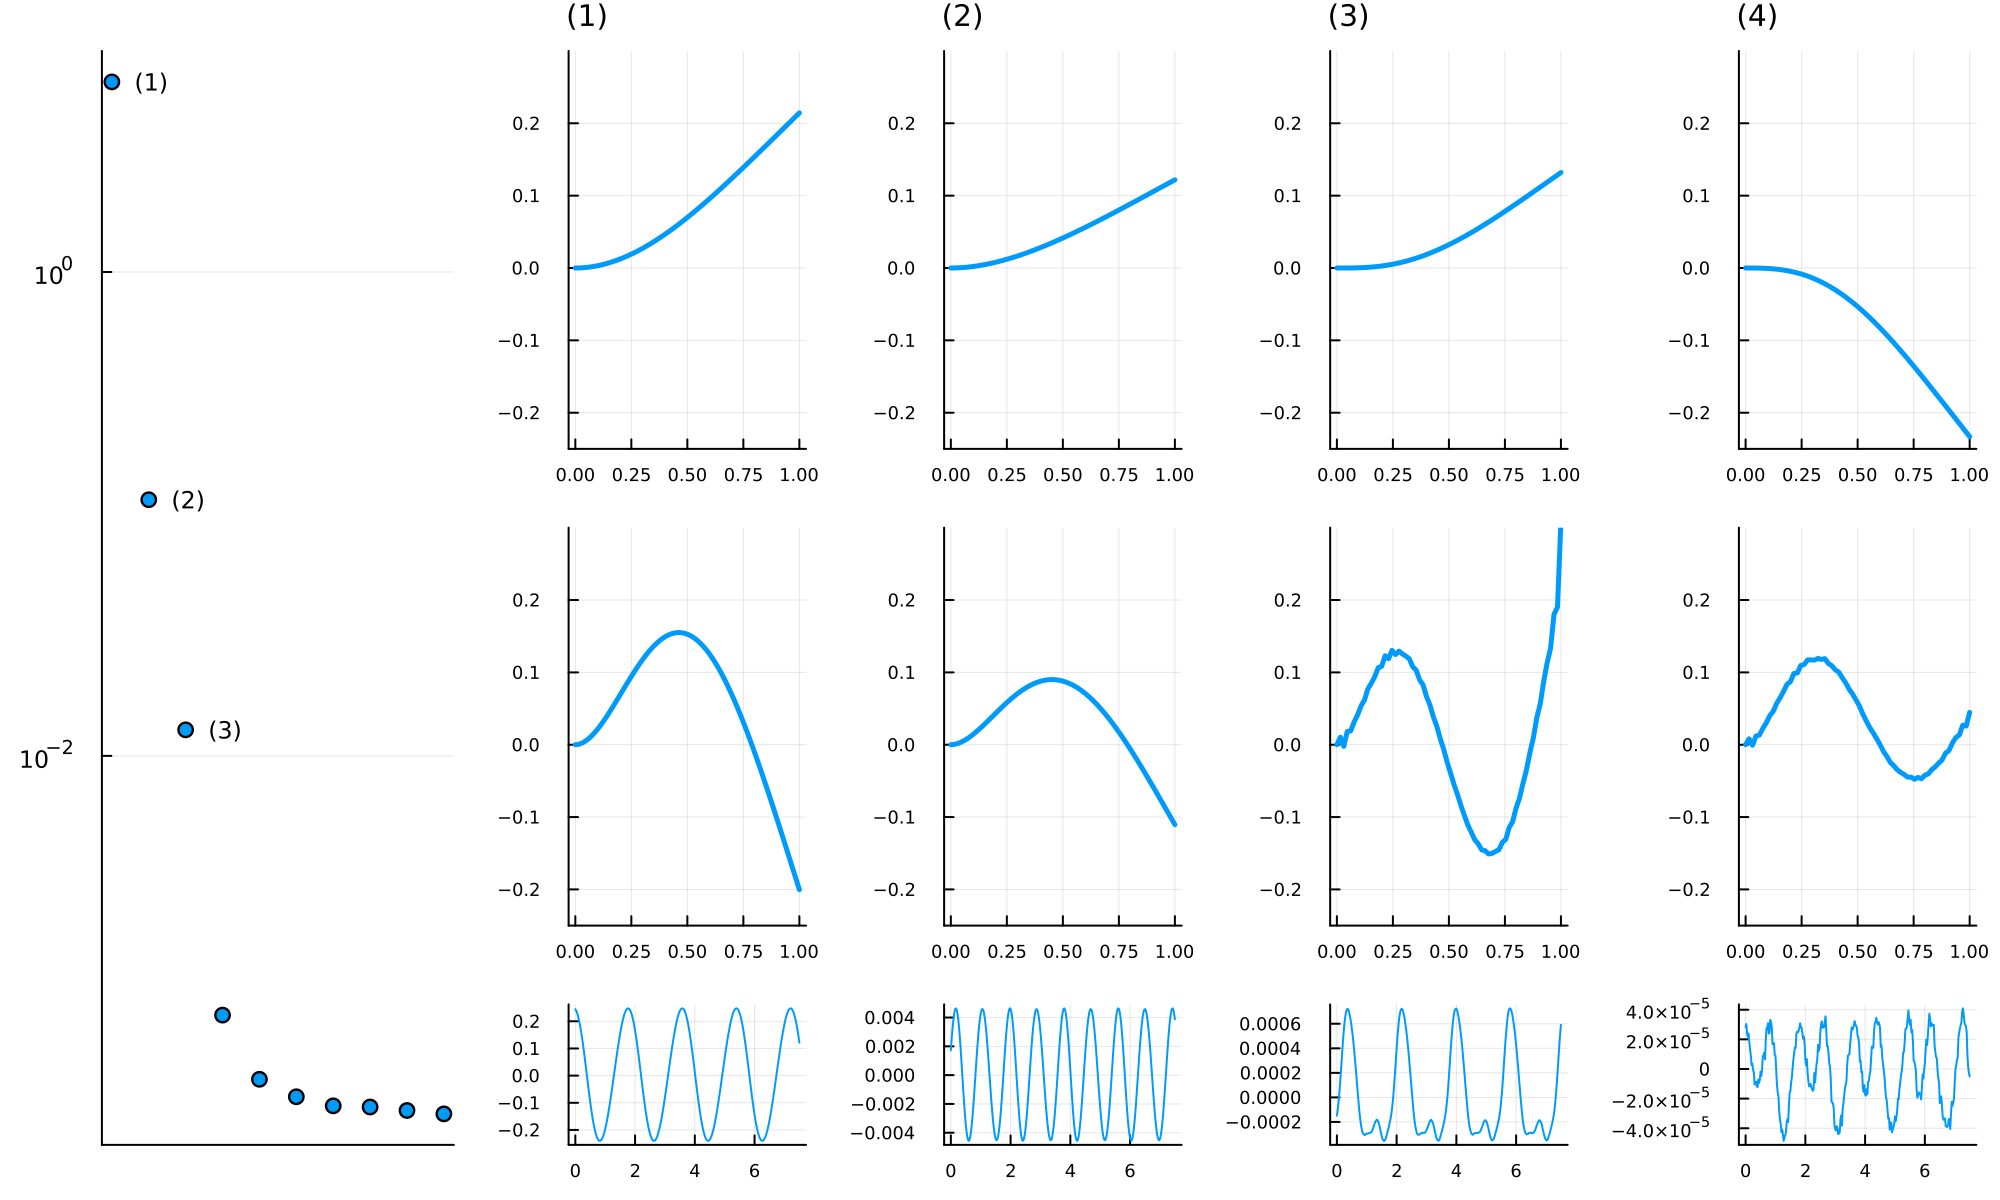

In [8]:
l_span = range(0,1, length = 66)

p1 = plot(l_span, res.modes[1:66,1], title = "(1)", titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3])
p2 = plot(l_span, res.modes[1:66,2], title = "(3)", titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3])
p3 = plot(l_span, res.modes[1:66,3], linewidth = 2.5, ylim = [-0.25, 0.3])
p4 = plot(l_span, res.modes[1:66,4], linewidth = 2.5, ylim = [-0.25, 0.3])

p11 = plot(l_span, res.modes[67:end,1], title = "(2)", titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3])
p21 = plot(l_span, res.modes[67:end,2], title = "(4)", titleloc = :left, linewidth = 2.5, ylim = [-0.25, 0.3])
p31 = plot(l_span, res.modes[67:end,3], linewidth = 2.5, ylim = [-0.25, 0.3])
p41 = plot(l_span, res.modes[67:end,4], linewidth = 2.5, ylim = [-0.25, 0.3])

t_span = 0:0.025:150*0.025*2

pp1 = plot(t_span, res.coefficients[1,200:500])#, ylim = [-0.5, 0.5])
pp2 = plot(t_span, res.coefficients[2,200:500])#, ylim = [-0.05, 0.05])
pp3 = plot(t_span, res.coefficients[3,200:500])#, ylim = [-0.025, 0.025])
pp4 = plot(t_span, res.coefficients[4,200:500])#, ylim = [-0.025, 0.025])

pp1 = plot(p1,p11,p2,p21,p3,p31,p4,p41,pp1,pp2,pp3,pp4, layout = grid(3,4, heights = [0.425, 0.425, 0.15]), legend = :false, titlefont = font(10), xtickfontsize = 6, ytickfontsize = 6)

pp2 = scatter(singularvals[1:10], yaxis = :log, xticks = :false, legend = :false, series_annotations = text.(["   (1)"; "   (2)"; "   (3)"; ""; ""; ""; ""; ""; ""; ""], :left, 8), ytickfontsize = 8)

p_save = plot(pp2, pp1, layout = grid(1,2, widths = [0.2, 0.80]), size = [1000, 600], dpi = 200)

savefig(p_save, "body_modes.png")

p_save

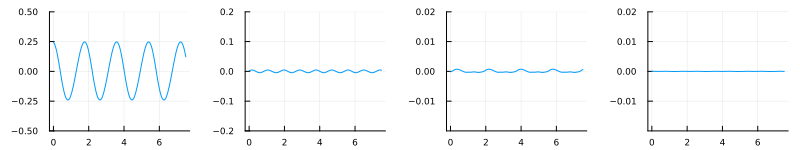

In [9]:
l = @layout [a b c d]

t_span = 0:0.025:150*0.025*2

p1 = plot(t_span, res.coefficients[1,200:500], ylim = [-0.5, 0.5])
p2 = plot(t_span, res.coefficients[2,200:500], ylim = [-0.2, 0.2])
p3 = plot(t_span, res.coefficients[3,200:500], ylim = [-0.02, 0.02])
p4 = plot(t_span, res.coefficients[4,200:500], ylim = [-0.02, 0.02])

plot(p1, p2, p3, p4, layout = l, legend = :false, size = [800, 150],xtickfontsize = 6, ytickfontsize = 6)

# Write Mode Files
---

NOTE: first file is the mean

In [10]:
# Collect mean and modes
A_mean = mean(X, dims = 2);
A_modes = res.modes[:,1:4];
A_both = hcat(A_mean, A_modes);

In [11]:
using DelimitedFiles

for i in 1:1:5
    mode_name =  "mode_S_" * string(i) * ".dat"
    println(mode_name)

    if i == 1

        A = [A_mean[1:66] A_mean[67:end] zeros(Float64, 66, 1)]'[:]

    else

        mode = Int64(i - 1)

        A = [res.modes[1:66,mode] res.modes[67:end,mode] zeros(Float64, 66, 1)]'[:]

    end

    writedlm(mode_name, A, ',')
end

mode_S_1.dat


mode_S_2.dat
mode_S_3.dat
mode_S_4.dat
mode_S_5.dat


# Test POD Inner
---

$u = u_0 + \sum_{i=1}^{n} a_i\phi_i$

$u - u_0 = \sum_{i=1}^{n} a_i\phi_i$

$<(u-u_0), \phi_i> = a_i = \int_0^l (u-u_0)\phi_i dx$

In [12]:
itr = 500
mode = 1
Δx = 1.0/66

amp = 0.5

# Inject the POD mode
a = vcat(ẋb[:,itr],ẏb[:,itr]) .+ res.modes[:,mode] .* amp


# # POD mode phase shift
# a = vcat(ẋb[:,itr],ẏb[:,itr]) .+ res.modes[:,mode] .* (amplitude[500-60]- amplitude[500])

# Subtract the mean
y_snap = a .- A_mean[:]

# Multiply by the POD mode
y_store = y_snap .* res.modes[:,mode]

# Summation of modes
b = 0.0

for i = 1:1:66*2# l = 66
   
    b = y_store[i]  + b

end


# should return "amp"
println(b - res.coefficients[mode,itr])

0.4974359198525337


# Compare reconstructed to original
---

In [13]:
reconstructedMode = res.modes*res.coefficients;

t = 500;

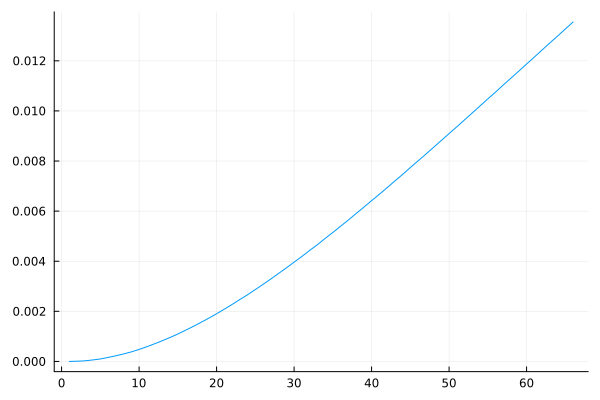

In [14]:
plot(ẏb[:,t], legend = :false)

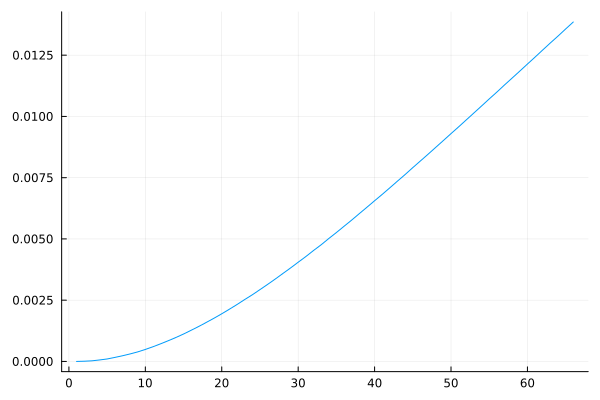

In [15]:
plot(reconstructedMode[67:end,t] + A_mean[67:end], legend = :false)

In [16]:
println(minimum(reconstructedMode[67:end,t] + A_mean[67:end] - ẏb[:,t]))
println(maximum(reconstructedMode[67:end,t] + A_mean[67:end] - ẏb[:,t]))

-4.515435125893405e-18
0.0003039465784256158


In [17]:
println(minimum(reconstructedMode[1:66,t] + A_mean[1:66] - ẋb[:,t]))
println(maximum(reconstructedMode[1:66,t] + A_mean[1:66] - ẋb[:,t]))

1.0986661620352578e-16
0.0005548567221692127


# Strength Calculation
---

$[(1 + \epsilon)^2 - 1]a_1^2 = \frac{\sigma}{2}\sum_{i=1}^{n} a_i^2$

$[(1 + \epsilon)^2 - 1] = \frac{\sigma}{2a_1^2}\sum_{i=1}^{n} a_i^2$

$(1 + \epsilon)^2 = \frac{\sigma}{2a_1^2}\sum_{i=1}^{n} a_i^2 + 1$

$(1 + \epsilon) = \sqrt{\frac{\sigma}{2a_1^2}\sum_{i=1}^{n} a_i^2 + 1}$

$\epsilon = \sqrt{\frac{\sigma}{2a_1^2}\sum_{i=1}^{n} a_i^2 + 1} - 1$

In [18]:
# function

ϵ(σ,a,A,itr) = sqrt.(σ'./(2 * A[a,itr]^2).*sum(A[:,itr].^2) .+ 1) .- 1

ϵ (generic function with 1 method)

In [19]:
A = res.coefficients;

# Sigma values
σ = [0.0 0.001 0.005 0.01 0.05 0.1 0.25 0.5 1.0];

rtn = ϵ(σ,1,A,1000)

9×1 Matrix{Float64}:
 0.0
 0.00025001750593278693
 0.001249463222374736
 0.0024973691766911887
 0.012425244663000434
 0.024699835103857426
 0.060671664632689914
 0.11805579481051054
 0.22478468337039748

# Plot Total Modal Energy Over Time
---

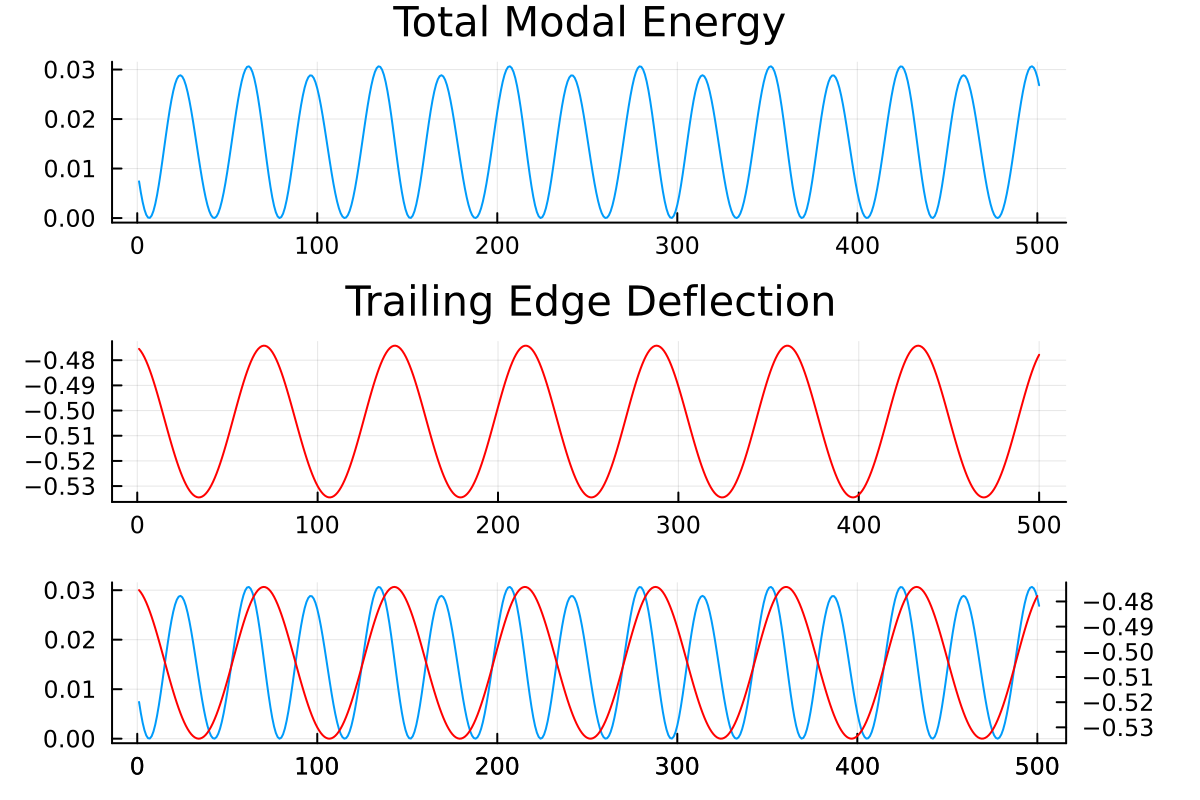

In [20]:

strength(A,itr) = sum(A[:,itr].^2)/2


sam = []
itr_max = 500

for i =  1000-itr_max:1:1000
    push!(sam,strength(A,i))

end

p1 = plot(sam, title = "Total Modal Energy", legend = :topleft)

p2 = plot(yb[end,1:1:itr_max], title = "Trailing Edge Deflection", c = :red)

plot(sam, label = "Energy", legend = :topleft)
p3 = plot!(twinx(), yb[end,1:1:itr_max], label = "Trailing Edge Deflection", c = :red)


p_save = plot(p1, p2, p3, layout = grid(3,1), legend = :false, rightmargin = 15mm, dpi = 200)

savefig(p_save, "total_modal_energy.png")

p_save

#### Explanation

We see that the mode energy occilated between zero and some posative value at a frequancy (2x) highere than that of that of the trailing edge of the beam (shedding cycle), This is to be expected as the beam velocity changes direction twice per shedding cycle. There is some phase shift between the two which I believe can be explained from the primary modes favoring movement in the stream-wise direction and modes acting against the stream-wise direction needing to have some non-zero energy to counteract the streamwise-modes when the movement changes direction.

# FFT
---

In [21]:
function rtnFRQ(X, frqs, N = 1)
    # Returns the Nth dominant frequency from FFT output data
    X_sort = sort(X, rev = :true)
    return frqs[findall(x -> x .== X_sort[N],X)]

end

rtnFRQ (generic function with 2 methods)

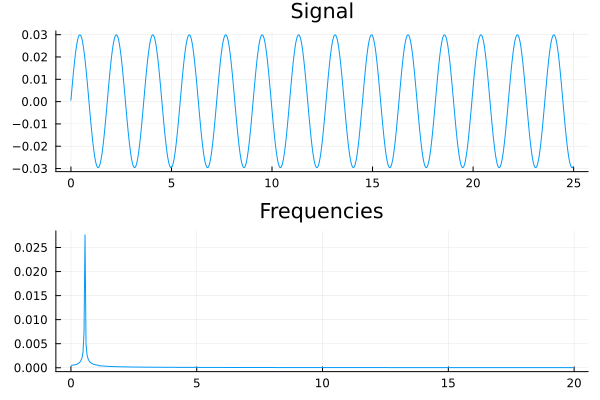

In [22]:
signal = ẏb_full[end,end-999:end]; # get the last 1000 readings

Δt = 0.025
fs = 1/Δt      # Sampling rate (Hz)
N = length(signal)
tmax = (N - 1)*Δt     # End time       

t = 0:1/fs:tmax; 

# ------------------

# Compute the FFT
X = fft(signal)
X_mag = abs.(X)/N
f = fftfreq(length(t), fs)

# Reduce to 1/2 the frequency
f_plot = f[1:Int64(N/2)]
X_mag_plot = 2X_mag[1:Int64(N/2)]

# DC signal doesnt get multiplied by 2
X_mag_plot[1] = X_mag_plot[1]/2

# Plot
l = @layout [a; b]
p1 = plot(t,signal, title = "Signal")
p2 = plot(f_plot, X_mag_plot, title = "Frequencies")
plot(p1,p2, legend = :false, layout = l)

In [23]:
# frequency in time
# --------------------
println(rtnFRQ(X_mag_plot, f_plot, 1))

# Time steps
# --------------------
println(rtnFRQ(X_mag_plot, f_plot, 1)/Δt)

[0.56]
[22.400000000000002]


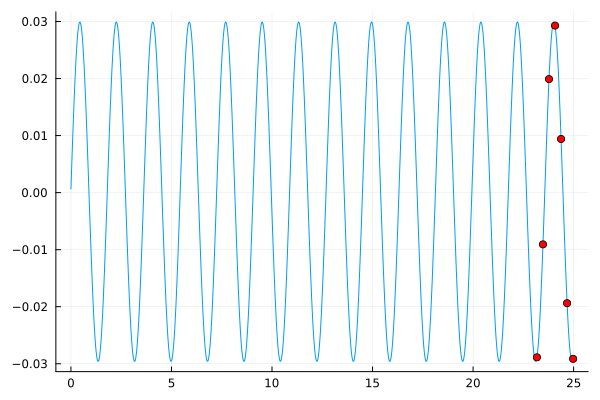

In [24]:
plot(t, signal, legend = :false)
sam = Int64(round(6/0.52)) #7*2
scatter!([t[end-sam*0] t[end-sam*1] t[end-sam*2] t[end-sam*3] t[end-sam*4] t[end-sam*5] t[end-sam*6]], 
        [signal[end-sam*0] signal[end-sam*1] signal[end-sam*2] signal[end-sam*3] signal[end-sam*4] signal[end-sam*5] signal[end-sam*6]], 
        c = :red)